In [1]:
import requests
import pprint
import json
import os
import math
import time
import pandas as pd
import numpy as np
import geopandas as gpd
import pyproj
import folium
import matplotlib.pyplot as plt

from shapely.geometry import mapping, shape, Point, Polygon, LineString
from folium import plugins
from folium.plugins import MarkerCluster, HeatMap

In [2]:
def get_access_token(consumer_key, consumer_secret) -> None :
    temp_res = requests.get(
        url="https://sgisapi.kostat.go.kr/OpenAPI3/auth/authentication.json",
        params={
            "consumer_key": consumer_key,
            "consumer_secret": consumer_secret
        }
    )

    access_token = temp_res.json()["result"]["accessToken"]

    return access_token


consumer_key = "0557bd5252b34142911d"
consumer_secret = "d90d86911924440786d4"

print('access token: ', get_access_token(consumer_key, consumer_secret))

access token:  f4845d61-c63c-4e37-a633-35ae28f5309b


In [3]:
def get_features_json(access_token, si_code) -> None:
    url="https://sgisapi.kostat.go.kr/OpenAPI3/boundary/hadmarea.geojson"
    params={
        "accessToken": access_token,
        "year": 2019, # 데이터 기준연도 범위: 2000 ~ 2019 / 2019가 가장 최근 데이터
        "adm_cd": si_code, # 행정구역코드
        "low_search": 0 # 행정구역코드에 해당하는 정보만 요청: 0, 1단계 하위 행정구역 정보 요청: 1, 2단계 하위 행정구역 정보 요청: 2
    }

    temp_features_json = requests.get(
        url=url,
        params=params
    ).json()["features"]

    return temp_features_json

# 대구시 행정경계 데이터로 대구시 시각화

In [4]:
access_token = get_access_token(consumer_key, consumer_secret)

In [33]:
# 대구시 행정경계 데이터를 json으로 가져오기
temp_features_json = get_features_json(access_token, 22)

In [34]:
# 대구시 행정경계 데이터의 geometry 읽어오기
temp_shape_data = temp_features_json[0]["geometry"]

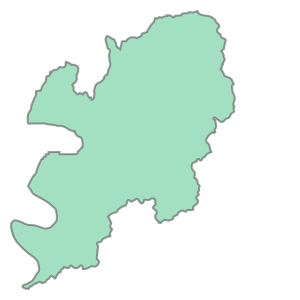

In [35]:
# shape라이브러리의 shapley 메서드로 json geometry 읽어와서 시각화 하기
temp_shape = shape(temp_shape_data)
temp_shape